<a href="https://colab.research.google.com/github/wesol05/dw_matrix_road_sign/blob/master/matrix3_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/My Drive/Colab Notebooks/matrix_three/data

/content/drive/My Drive/Colab Notebooks/matrix_three/data


In [22]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
train = pd.read_pickle('train.p')
test = pd.read_pickle('test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim == 1 : y_train = to_categorical(y_train)
if y_test.ndim == 1 : y_test = to_categorical(y_test)
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential((
      Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
      Flatten(),
      Dense(num_classes, activation='softmax')
  ))

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir=os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks=[tensorboard_callback]

  )

  return model

In [14]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 26.9735 - accuracy: 0.7027 - val_loss: 0.4094 - val_accuracy: 0.8961
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2752 - accuracy: 0.9323 - val_loss: 0.1815 - val_accuracy: 0.9555
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1562 - accuracy: 0.9614 - val_loss: 0.0964 - val_accuracy: 0.9762
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1213 - accuracy: 0.9701 - val_loss: 0.0851 - val_accuracy: 0.9800
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1124 - accuracy: 0.9733 - val_loss: 0.0719 - val_accuracy: 0.9806


In [0]:
df = pd.read_csv('signnames.csv')

labels_dict = df.to_dict()['b']

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [25]:
predict(model_trained, X_test, y_test)

0.817687074829932

In [0]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential((
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Flatten(),

      Dense(1024, activation='relu'),
      Dropout(0.3),

      Dense(num_classes, activation='softmax')
  ))

def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)

  return predict(model_trained, X_test, y_test)  

In [35]:
train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 5.0846 - accuracy: 0.3491 - val_loss: 1.1457 - val_accuracy: 0.6842
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 1.0353 - accuracy: 0.6824 - val_loss: 0.3652 - val_accuracy: 0.9191
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.5565 - accuracy: 0.8324 - val_loss: 0.1747 - val_accuracy: 0.9568
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.3713 - accuracy: 0.8885 - val_loss: 0.0928 - val_accuracy: 0.9823
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2761 - accuracy: 0.9157 - val_loss: 0.0790 - val_accuracy: 0.9858


0.9034013605442177

In [0]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential((
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
      Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Flatten(),

      Dense(1024, activation='relu'),
      Dropout(0.3),

      Dense(num_classes, activation='softmax')
  ))

In [37]:
train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.2447 - accuracy: 0.5218 - val_loss: 0.3079 - val_accuracy: 0.9293
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.4524 - accuracy: 0.8674 - val_loss: 0.0982 - val_accuracy: 0.9811
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2348 - accuracy: 0.9305 - val_loss: 0.0457 - val_accuracy: 0.9910
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1640 - accuracy: 0.9526 - val_loss: 0.0228 - val_accuracy: 0.9950
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1134 - accuracy: 0.9675 - val_loss: 0.0211 - val_accuracy: 0.9942


0.9734693877551021

In [39]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential((
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Flatten(),

      Dense(1024, activation='relu'),
      Dropout(0.3),

      Dense(num_classes, activation='softmax')
  ))
# get_cnn_v4(input_shape, num_classes).summary()

train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 19ms/step - loss: 2.1880 - accuracy: 0.3973 - val_loss: 0.6447 - val_accuracy: 0.8196
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.6701 - accuracy: 0.7961 - val_loss: 0.1654 - val_accuracy: 0.9614
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.3581 - accuracy: 0.8906 - val_loss: 0.0837 - val_accuracy: 0.9770
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2386 - accuracy: 0.9281 - val_loss: 0.0663 - val_accuracy: 0.9811
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2024 - accuracy: 0.9417 - val_loss: 0.0420 - val_accuracy: 0.9873


0.9566893424036281

In [40]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential((
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Flatten(),

      Dense(1024, activation='relu'),
      Dropout(0.3),

      Dense(1024, activation='relu'),
      Dropout(0.3),

      Dense(num_classes, activation='softmax')
  ))
# get_cnn_v4(input_shape, num_classes).summary()

train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 19ms/step - loss: 2.7035 - accuracy: 0.2547 - val_loss: 1.4160 - val_accuracy: 0.5206
Epoch 2/5
272/272 [==============================] - 5s 18ms/step - loss: 1.0940 - accuracy: 0.6444 - val_loss: 0.3442 - val_accuracy: 0.9021
Epoch 3/5
272/272 [==============================] - 5s 18ms/step - loss: 0.4632 - accuracy: 0.8515 - val_loss: 0.1210 - val_accuracy: 0.9599
Epoch 4/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2852 - accuracy: 0.9122 - val_loss: 0.0608 - val_accuracy: 0.9834
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2049 - accuracy: 0.9375 - val_loss: 0.0426 - val_accuracy: 0.9890


0.9752834467120182

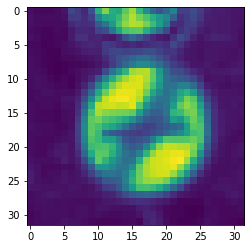

In [42]:
plt.imshow(color.rgb2gray(X_train[0]))

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [49]:
model = get_cnn_v5((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray, y_train)
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 5s 19ms/step - loss: 2.8556 - accuracy: 0.2132 - val_loss: 0.7264 - val_accuracy: 0.7907
Epoch 2/5
272/272 [==============================] - 5s 18ms/step - loss: 0.5080 - accuracy: 0.8437 - val_loss: 0.1112 - val_accuracy: 0.9662
Epoch 3/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2344 - accuracy: 0.9265 - val_loss: 0.0630 - val_accuracy: 0.9815
Epoch 4/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1574 - accuracy: 0.9503 - val_loss: 0.0378 - val_accuracy: 0.9885
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1237 - accuracy: 0.9609 - val_loss: 0.0267 - val_accuracy: 0.9920


0.9696145124716553